<a href="https://colab.research.google.com/github/les1smore/DATA606-Capstone-Project/blob/main/5_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Fitting 

## Logistic Regression with PCA

**Select the best number of PCs**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# Define the cross-validation folds
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Use 3 fold cross-validation method to determine the number of dimensions (n_components)
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=3, shuffle=True, random_state=42)
pipe = Pipeline(steps = [
                 ('scale', StandardScaler()),
                 ('pca', PCA()),
                ])

param_grid = {
    "pca__n_components": [15, 20, 25, 30]
}


search = GridSearchCV(pipe, param_grid, cv = 3, n_jobs=-1)

search.fit(X_train_tx2, y_train)
print(search.best_params_)

{'pca__n_components': 30}


In [ ]:
# Validate many components needed for 95% cumulative variance
pca = PCA(n_components=0.95)
X_train_scaled_PCA = pca.fit_transform(X_train_tx2)

pca.n_components_

30

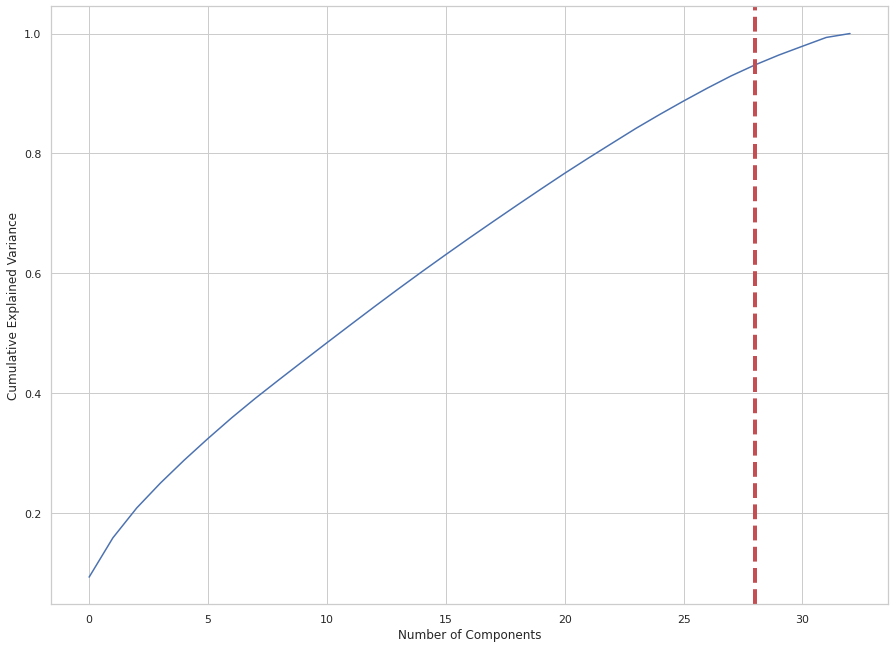

None

,Cumulative Variance Ratio,Explained Variance Ratio
23,0.841939,0.024687
24,0.865112,0.023174
25,0.887440,0.022327
26,0.908948,0.021508
27,0.929354,0.020406
28,0.947582,0.018228
29,0.964013,0.016431
30,0.978822,0.014809
31,0.993451,0.014630
32,1.000000,0.006549


In [ ]:
# Set the n_components to 33 to see the explained variance of all the generated components
pca_test = PCA(n_components=33)
pca_test.fit(X_train_tx2)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=28, ymin=0, ymax=1)
display(plt.show())


# Show the dataframe 
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.tail(10))

This graph shows that after more than 28 components, we don't gain much explained variance.

**Evaluate the # of principal components using MSE**

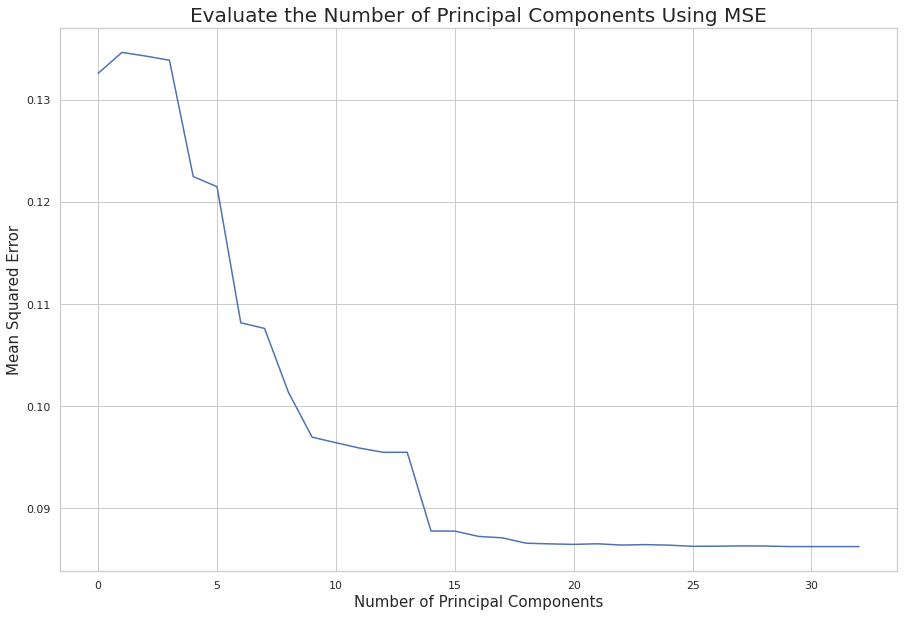

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import Lasso, lasso_path
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define cross validation method
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)


clf = LogisticRegression()
mse = []

# Calculate MSE with only the intercept
score = -1 * cross_val_score(clf, np.ones((len(X_train_scaled_PCA), 1)), 
                             y_train, cv = cv,
                             scoring='neg_mean_squared_error').mean()
mse.append(score)


# Calculate MSE using cross-validation in a loop
for i in np.arange(1,33):
    score = -1 * cross_val_score(clf, X_train_scaled_PCA[:,:i],
                                 y_train, 
                                 cv = cv,
                                 scoring = 'neg_mean_squared_error').mean()
    mse.append(score)

# Plot the result
plt.figure(figsize=(15,10))
plt.plot(mse)
plt.xlabel('Number of Principal Components',fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('Evaluate the Number of Principal Components Using MSE', fontsize=20)
plt.show()


The MSE plumped after 14 principal components.

In [ ]:
# Apply PCA with 28 components
X_scaled = std_scaler.fit_transform(X)
pca = PCA(n_components=28)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.shape)

(315853, 28)


In [ ]:
# Take a look at the tranformed dataset
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.739785,2.218622,-1.299197,0.645137,-0.562030,-0.666149,-1.919584,1.093712,0.512641,-0.675426,...,0.767078,-0.049167,0.008850,-0.754514,0.312728,-0.985752,0.728490,1.405326,0.150258,0.365896
1,-1.558362,1.941545,-0.864032,2.017103,-3.384294,0.816991,1.026232,-0.612467,0.438874,-0.289181,...,-0.361303,0.724653,-2.205000,-0.434440,-0.476746,0.655042,0.537663,-0.074153,-1.084355,0.383302
2,2.438825,2.056054,-1.143071,1.943916,-1.868150,-0.621171,-1.803162,-0.432608,0.408719,2.883651,...,1.473122,-0.139532,-1.109143,1.872412,0.285920,-0.783851,-0.824284,0.027038,0.742257,-0.505701
3,0.862278,-2.338435,-0.552857,1.666675,-3.011078,-1.530031,-1.025042,-0.073202,0.684755,0.631015,...,-0.408967,-0.048843,-1.131445,0.060234,0.308050,0.498622,-0.369113,-0.129724,0.142263,-0.484401
4,0.613801,-1.184758,-0.043867,0.758729,-1.990724,-1.975591,1.464067,-1.498303,0.244977,-0.509866,...,0.124058,-0.097594,1.694667,-0.205292,0.326162,-0.036853,0.126076,1.467996,-0.081771,-0.029758


- The original dataset has 33 features, while the PCA-transformed dataset has 28 components.
- This transformed dataset captured around 95% variability in the original dataset.

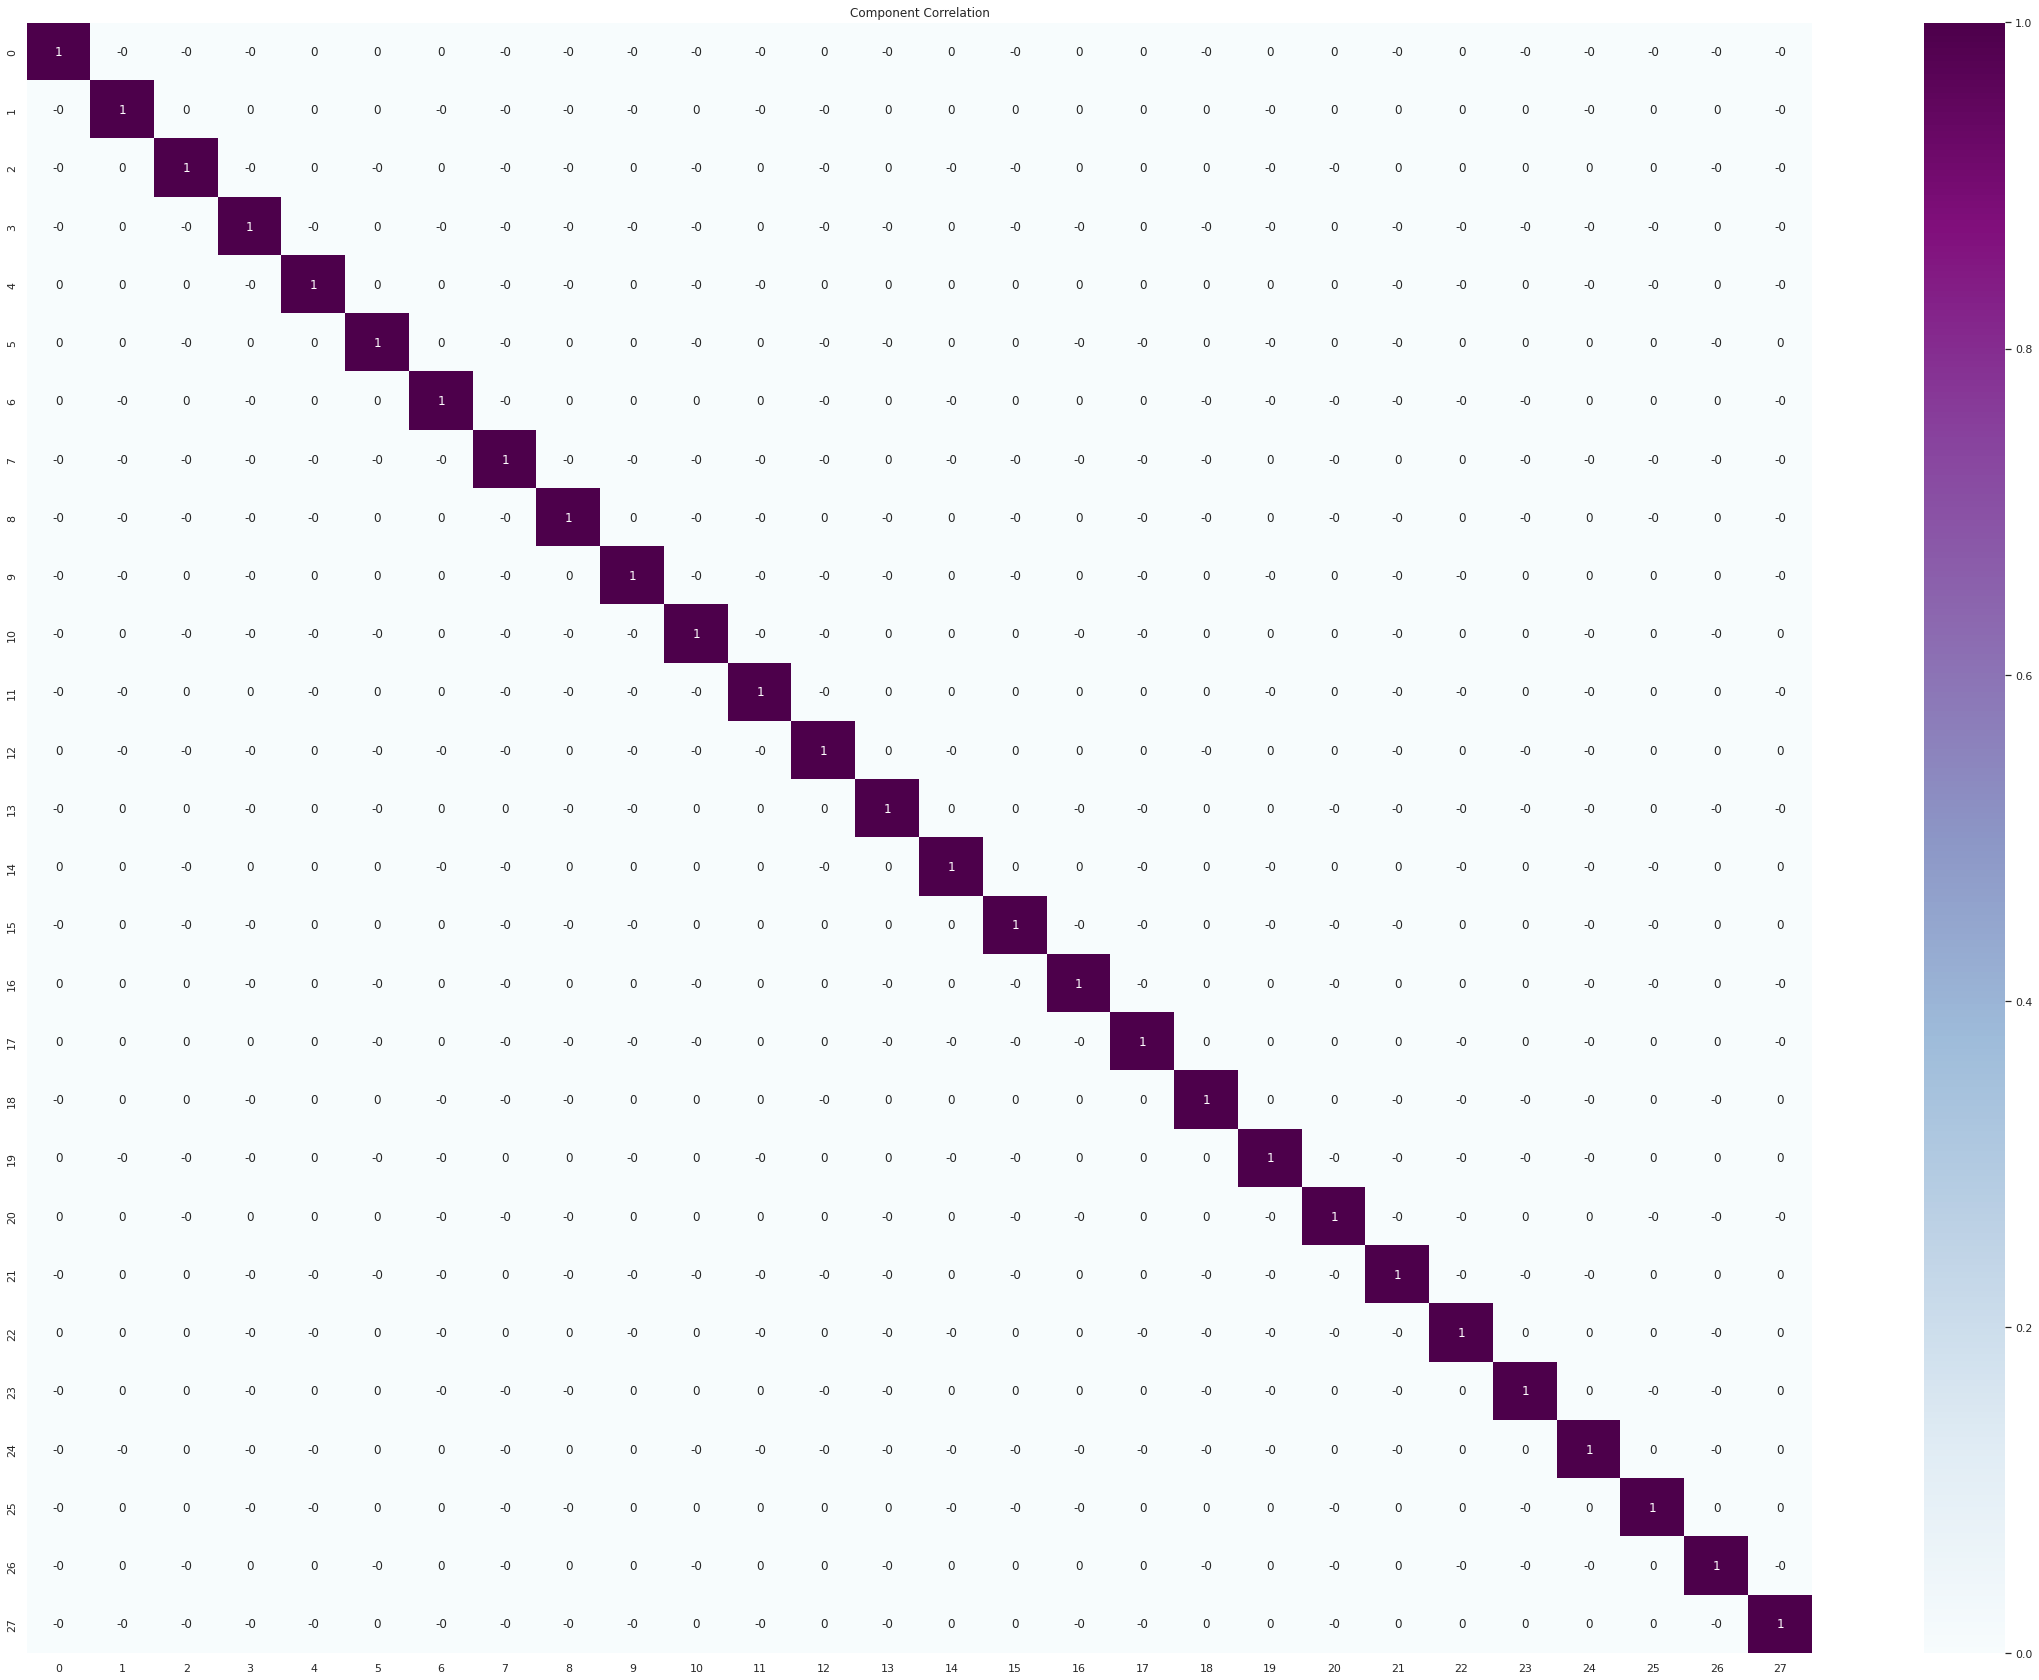

In [ ]:
# Check multicollinearity among components
fig = plt.figure(figsize = (40,30))
sns.heatmap(X_pca.corr(),annot=True, cmap ='BuPu',fmt='.0f')
plt.title("Component Correlation")
plt.show()

Recalling the heatmap and correlation figures in EDA, there are some features highly correlated with one or more of the other variables, namely with high multicollinearity. However, such multicollinearity should be eliminated in this transformed dataset due to PCA transformation. 

Train Accuracy: 0.91
Test Accuracy: 0.91


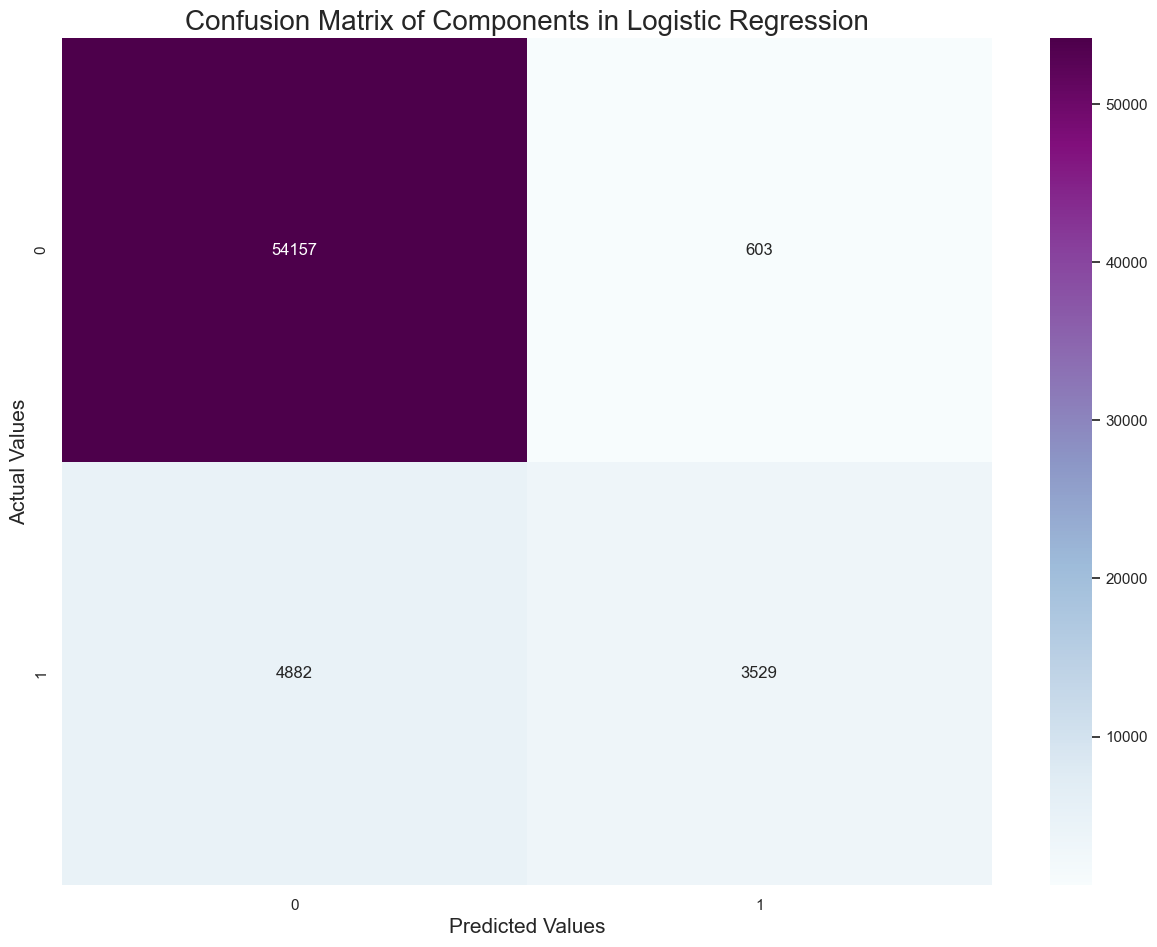

In [ ]:
# Split the component dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y,
                                                            test_size=0.2, shuffle=True,
                                                            random_state=1000)
# Fit the logistic regression model
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Measure the model performance
from sklearn.metrics import accuracy_score
train_acc = np.round(accuracy_score(y_train, clf.predict(X_train_pca)), 2)
test_acc = np.round(accuracy_score(y_test, y_pred), 2)
print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
clf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(clf_matrix, annot=True, cmap = 'BuPu', fmt='.0f')
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize= 15)
plt.title('Confusion Matrix of Components in Logistic Regression', fontsize=20)
plt.show()

In [ ]:
# Run the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     54760
         1.0       0.85      0.42      0.56      8411

    accuracy                           0.91     63171
   macro avg       0.89      0.70      0.76     63171
weighted avg       0.91      0.91      0.90     63171



- **Precision** *(Accuracy of positive predictions)*: Out of all survey respondents that the model predicted would have diabetes, 85% did. 
- **Recall** *(Fraction of correctly identified positive predictions)*: Out of all survey respondents with diabetes, our model only predicted correctly for 42% of them.
- **F1 Score** *(Harmonic mean of precision and recall)*: This value is not close to 1, indicating that the model performance may not be quite good at predicting whether the respondent has diabetes. Since we have imbalanced data, we will consider the F1 score as a major evaluation metric for capturing Precision and Recall. And we'll use this to compare classifier models as we move forward.

**Apply the ROC-AUC Plot**

AUC is a good way for evaluating a binary classification problem.

ROC-AUC 0.8995490118291822


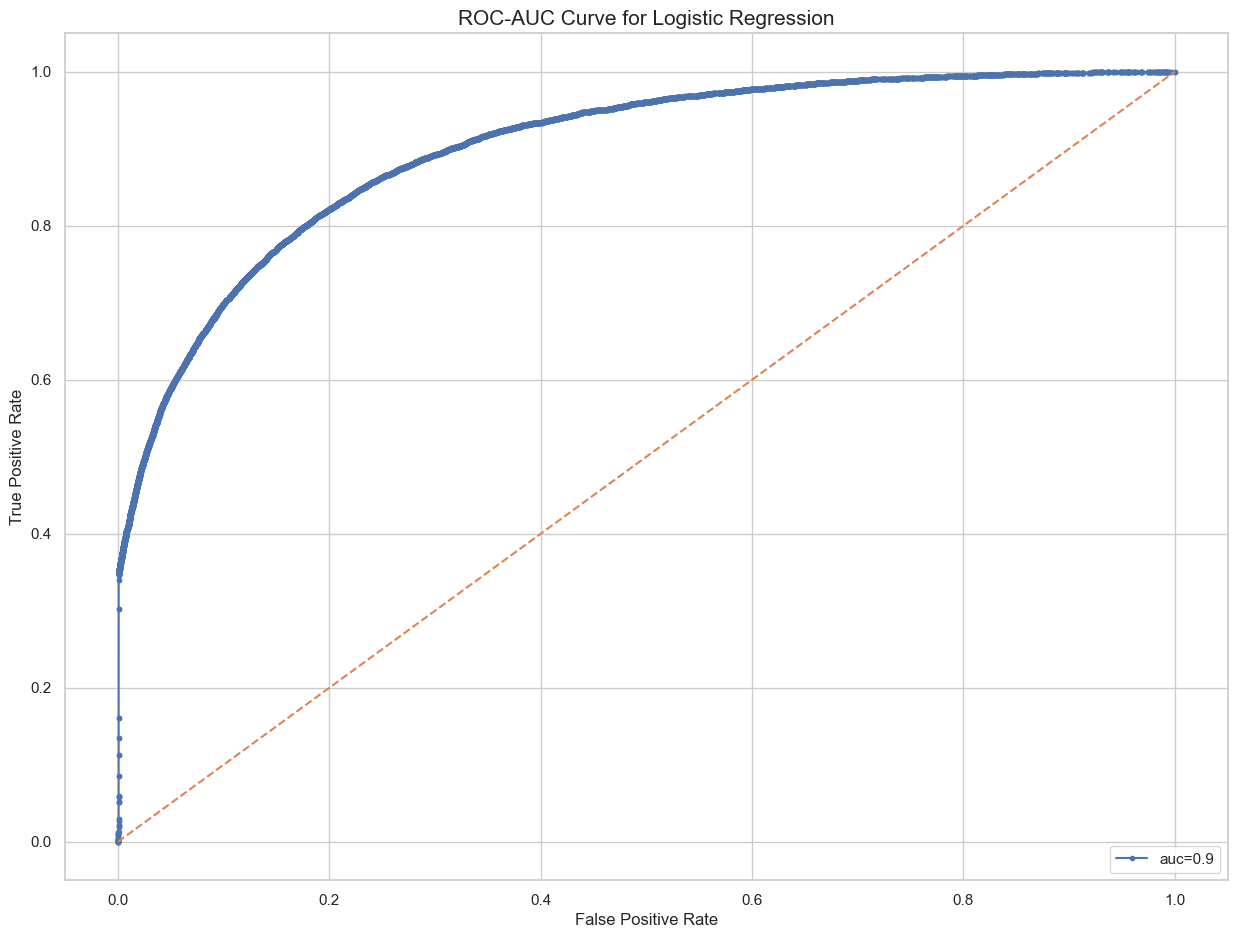

In [ ]:
from sklearn import metrics


y_pred_proba = clf.predict_proba(X_test_pca)[::,1]

clf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC', clf_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Visualize the result
label_auc = str(round(clf_auc,2))
plt.plot(fpr,tpr,label="auc="+label_auc, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-AUC Curve for Logistic Regression', fontsize=15)
plt.legend(loc=4)
plt.show()

As the AUC score is at 0.9, close to 1, the classifier did a great job distinguishing all the positive and negative points correctly, namely those who have diabetes and those who don't. 

## KNN

In [ ]:
# Scale the data
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
X_scale = scale(X)

# Split the scaled data again
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, 
                                                                  y, 
                                                                  stratify=y, 
                                                                  test_size=.3, 
                                                                  random_state=1000)

In [ ]:
# Fit the model
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_scaled, y_train)

print('k-NN score for test set: %f' % knn_model.score(X_test_scaled, y_test))
print('k-NN score for training set: %f' % knn_model.score(X_train_scaled, y_train))


k-NN score for test set: 0.870932
k-NN score for training set: 0.902432


In [ ]:
y_true, y_pred = y_test, knn_model.predict(X_test_scaled)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     82193
         1.0       0.53      0.22      0.31     12563

    accuracy                           0.87     94756
   macro avg       0.71      0.59      0.62     94756
weighted avg       0.84      0.87      0.85     94756



- **Precision** *(Accuracy of positive predictions)*: Out of all survey respondents that the model predicted would have diabetes, 53% did. 
- **Recall** *(Fraction of correctly identified positive predictions)*: Out of all survey respondents with diabetes, our model only predicted correctly for 21% of them.
- **F1 Score** *(Harmonic mean of precision and recall)*: This value is not close to 1, indicating that the model performance may not be quite good at predicting whether the respondent has diabetes.

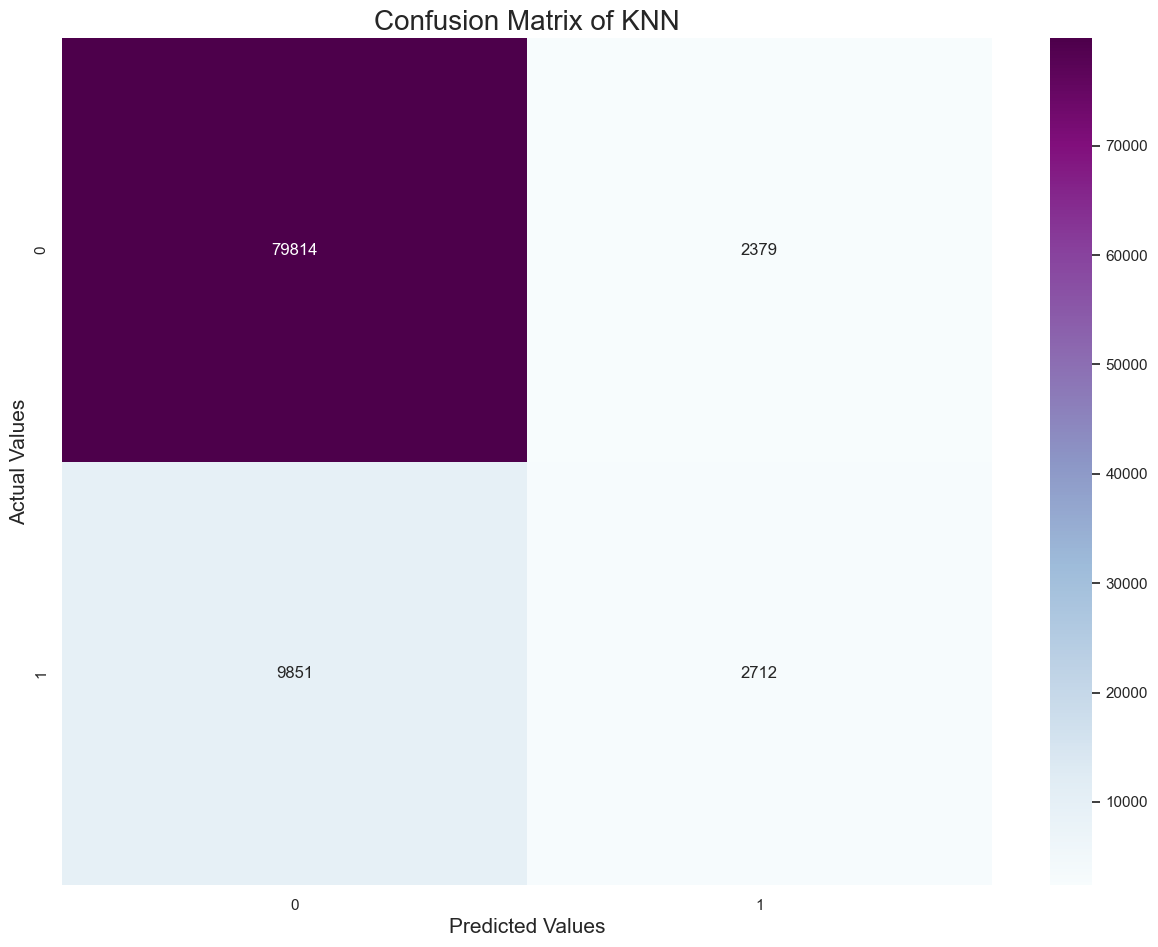

In [ ]:
from sklearn.metrics import confusion_matrix
knn_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(knn_matrix, annot=True, cmap = 'BuPu', fmt='.0f')
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize= 15)
plt.title('Confusion Matrix of KNN', fontsize=20)
plt.show()

ROC-AUC 0.7464842944119641


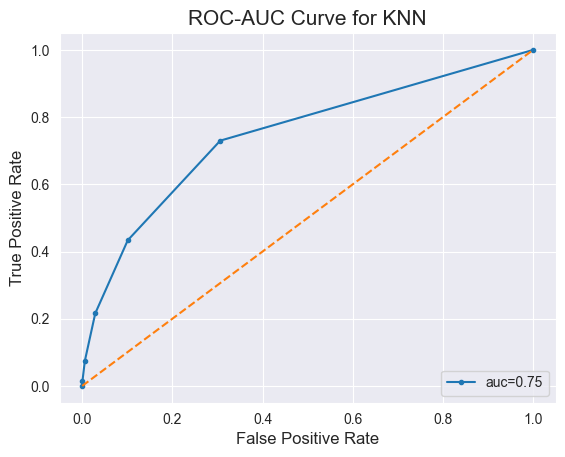

In [ ]:
from sklearn import metrics

y_pred_proba = knn_model.predict_proba(X_test_scaled)[::,1]

clf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC', clf_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Visualize the result
label_auc = str(round(clf_auc,2))
plt.plot(fpr,tpr,label="auc="+label_auc, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-AUC Curve for KNN', fontsize=15)
plt.legend(loc=4)
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Call and fit the model without tuning hyperparameters
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

# Evaluate the model performance before tuning
from sklearn.metrics import roc_curve, auc 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc


0.7261333045818305

In [ ]:
# Tune the hyperparameters 
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator = dt_clf, param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

accuracy_df = pd.DataFrame(grid_search.cv_results_)
accuracy_df.nlargest(5, 'mean_test_score')

Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
24,1.943779,0.015561,0.037080,0.001755,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.914790,0.915928,0.916507,0.915747,0.915743,0.000618,1
49,1.740982,0.184084,0.035144,0.007010,entropy,20,100,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.914790,0.915928,0.916073,0.915874,0.915666,0.000511,2
42,1.470087,0.028199,0.032644,0.000754,entropy,10,20,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.914446,0.915892,0.915240,0.915204,0.915196,0.000512,3
44,1.508687,0.048617,0.035879,0.004483,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.914392,0.915729,0.915638,0.914607,0.915092,0.000598,4
19,1.558744,0.058878,0.031950,0.001203,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.914283,0.915729,0.915638,0.914607,0.915064,0.000631,5


In [ ]:
# Locate the best estimators
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=100, random_state=42)

In [ ]:
def model_evaluation(clf):
          print('Train Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
          print('Test Confusion Matrix:', confusion_matrix(y_train, clf.predict(X_train)))
          print('-'*20)
          print('Test Accuracy:', accuracy_score(y_test, clf.predict(X_test)))
          print('Test Confusion Matrix:', confusion_matrix(y_test, clf.predict(X_test)))

In [ ]:
dt_clf = grid_search.best_estimator_
model_evaluation(grid_search.best_estimator_)

Train Accuracy: 0.9177962613694441
Test Confusion Matrix: [[189526   2257]
 [ 15918  13396]]
--------------------
Test Accuracy: 0.9139790620119043
Test Confusion Matrix: [[81142  1051]
 [ 7100  5463]]


In [ ]:
print(classification_report(y_test, dt_clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     82193
         1.0       0.50      0.53      0.52     12563

    accuracy                           0.87     94756
   macro avg       0.71      0.73      0.72     94756
weighted avg       0.87      0.87      0.87     94756



## Random Forest Classifier

In [ ]:
# Initiate a RF model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()

In [ ]:
# Apply 3-fold CVs to tune the hyperparameter.
param_dist = {'n_estimators': [int(x) for x in np.linspace(start=10, stop=100, num=5)],
               'min_samples_split': [int(x) for x in np.linspace(start=2, stop=10, num=5)],
               'max_depth':[int(x) for x in np.linspace(start=1, stop=15, num=5)]}

rs = RandomizedSearchCV(rfc, param_dist,
                        cv=3, verbose = 1,n_jobs=-1, random_state=0)

rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 32, 'min_samples_split': 6, 'max_depth': 15}

In [ ]:
# Build a dataframe of RandomSearchCV results to get a good range of values
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

rs_df.head(5)

,param_n_estimators,param_min_samples_split,param_max_depth,mean_test_score,rank_test_score
0,32,6,15,0.916046,1
1,77,10,11,0.915612,2
2,10,8,11,0.915159,3
3,100,2,8,0.914381,4
4,77,6,8,0.914219,5


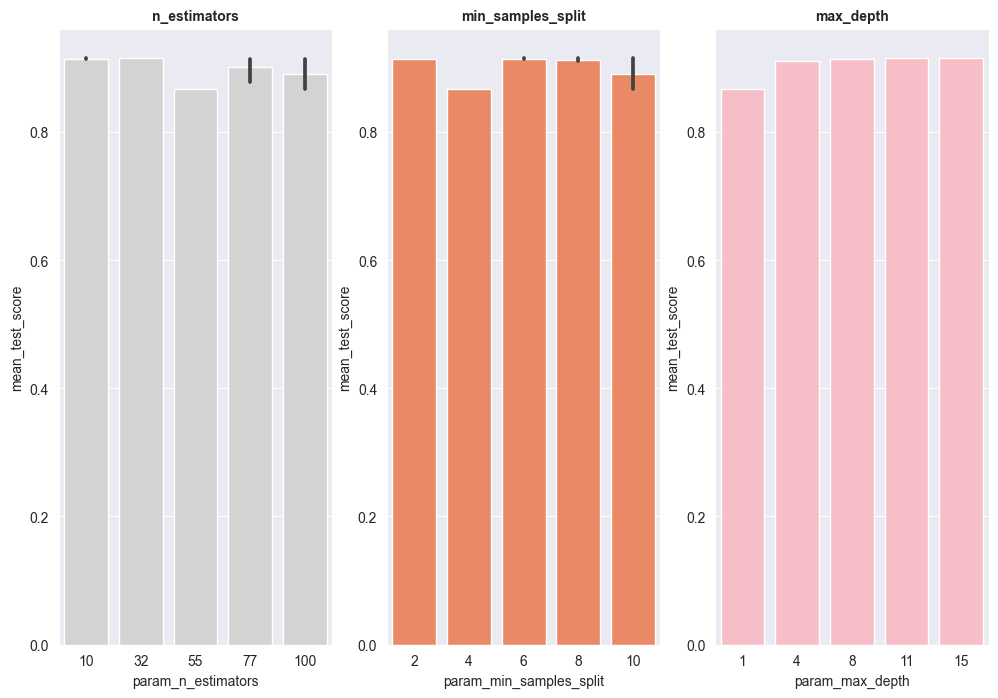

In [ ]:
# Creat barplots where x-axis is each hyperparameter, y-axis is the mean score of the model made at each value
fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set(style='whitegrid', color_codes=True)
fig.set_size_inches(12,8)

sns.barplot(x='param_n_estimators', y ='mean_test_score', data=rs_df,
            ax=axs[0], color='lightgrey')
axs[0].set_title(label='n_estimators', size=10, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, 
            ax=axs[1], color='coral')
axs[1].set_title(label = 'min_samples_split', size=10, weight='bold')


sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, 
            ax=axs[2], color='lightpink')
axs[2].set_title(label = 'max_depth', size=10, weight='bold')

plt.show()

- `n_estimators`: 10, 32, 77, and 100 seem to have the highest average scores.

- `min_samples_split`: 2, 6, 8, 10 seem to perform the best.

- `max_depth`: values from 4 to 15 seem to perform well.

- After using RandomSearcCV, we can use GridSearchCV to perform a more refined search for our best hyperparameters.

- In GridSearchCV, every single combination of hyperparameter values is tired which takes much more computational power than RandomSearchCV, where we can directly control how many iterations we want to try.

- Therefore, we perform GridSearchCV after using RandomSearch CV, to help narrow our search first.

In [ ]:
param_grid = {'n_estimators':[10, 32, 77, 100],
              'max_depth':[int(x) for x in np.linspace(start=4, stop=15, num=2)]}

gs = GridSearchCV(rfc, param_grid, cv=3, verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomForestClassifier(max_depth=15, n_estimators=77)

In [ ]:
# Fit the classifier again with tuned hyperparameters
rfc_tuned = RandomForestClassifier(min_samples_split = 6,
                             max_depth=32,
                             n_estimators=15)

rfc_tuned.fit(X_train, y_train)

predicted_rfc = rfc_tuned.predict(X_test)


Accuracy: 91.32%


/Users/leslie/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


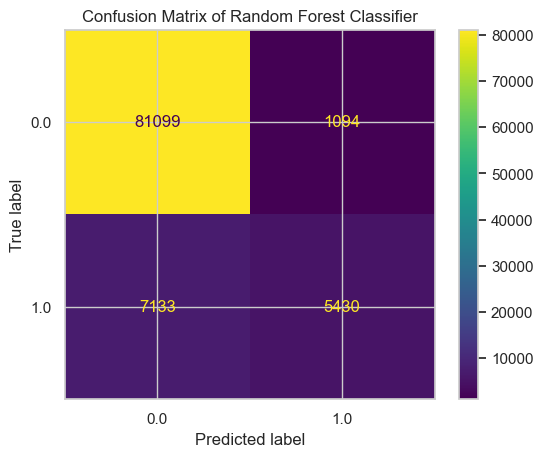

In [ ]:
import sklearn.metrics as metrics
accuracy_rfc = accuracy_score(y_test, predicted_rfc)
print('Accuracy: %.2f%%' % (accuracy_rfc * 100.0))

#cm_rfc = confusion_matrix(y_test, predicted_rfc)
#print('Confusion Matrix\n')
#print(cm_rfc)

disp_rfc = metrics.plot_confusion_matrix(rfc_tuned, X_test, y_test)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [ ]:
model_evaluation(rfc_tuned)

Train Accuracy: 0.9592577013708915
Test Confusion Matrix: [[191590    193]
 [  8815  20499]]
--------------------
Test Accuracy: 0.9131770019840433
Test Confusion Matrix: [[81099  1094]
 [ 7133  5430]]


In [ ]:
print(classification_report(y_test, rfc_tuned.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     82193
         1.0       0.83      0.43      0.57     12563

    accuracy                           0.91     94756
   macro avg       0.88      0.71      0.76     94756
weighted avg       0.91      0.91      0.90     94756



ROC-AUC 0.894101839826928


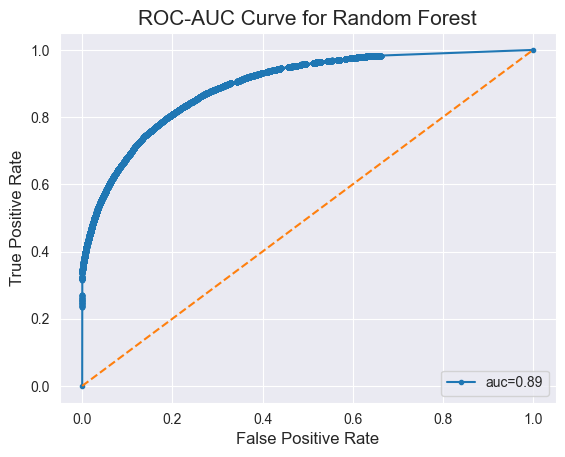

In [ ]:
from sklearn import metrics

y_pred_proba = rfc_tuned.predict_proba(X_test)[::,1]

clf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC', clf_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Visualize the result
label_auc = str(round(clf_auc,2))
plt.plot(fpr,tpr,label="auc="+label_auc, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-AUC Curve for Random Forest', fontsize=15)
plt.legend(loc=4)
plt.show()

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier 

In [ ]:
# Initiate a XGB model, and apply 3-fold CVs to tune the hyperparameter.
xgb = XGBClassifier()

param_dist = {'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=5)],
              'max_depth':[int(x) for x in np.linspace(start=1, stop = 10, num=2)],
              'min_child_weight':[int(x) for x in np.linspace(start=1, stop=10, num=2)]
}

rs = RandomizedSearchCV(xgb, param_dist,
                        n_iter=100, cv=3, verbose = 1,n_jobs=-1, random_state=0)

rs.fit(X_train, y_train)
rs.best_params_

/Users/leslie/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 10, 'min_child_weight': 1, 'max_depth': 10}

In [ ]:
# Pull out a dataframe of RandomSearchCV results to get a good range of values
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

rs_df.head(5)

,param_n_estimators,param_min_child_weight,param_max_depth,mean_test_score,rank_test_score
0,10,1,10,0.916607,1
1,200,1,1,0.916584,2
2,200,10,1,0.916530,3
3,152,10,1,0.916480,4
4,152,1,1,0.916467,5


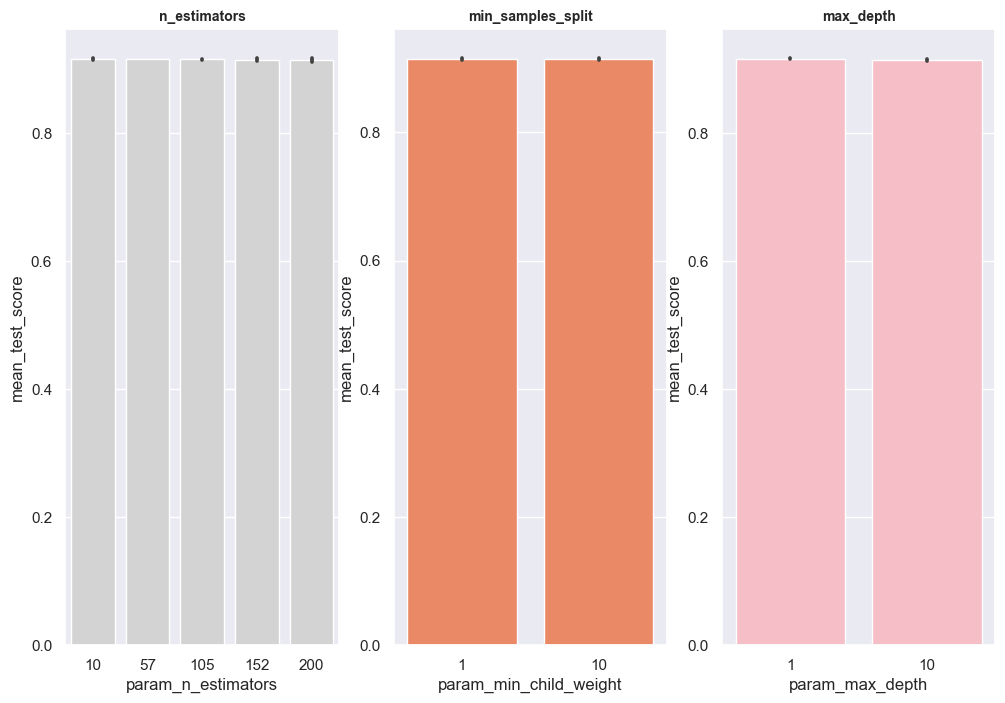

In [ ]:
# Creat barplots where x-axis is each hyperparameter, y-axis is the mean score of the model made at each value
fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set(style='whitegrid', color_codes=True)
fig.set_size_inches(12,8)

sns.barplot(x='param_n_estimators', y ='mean_test_score', data=rs_df,
            ax=axs[0], color='lightgrey')
axs[0].set_title(label='n_estimators', size=10, weight='bold')

sns.barplot(x='param_min_child_weight', y='mean_test_score', data=rs_df, 
            ax=axs[1], color='coral')
axs[1].set_title(label = 'min_samples_split', size=10, weight='bold')


sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, 
            ax=axs[2], color='lightpink')
axs[2].set_title(label = 'max_depth', size=10, weight='bold')

plt.show()

In [ ]:
# Fit the classifier again with tuned hyperparameters
xgb_tuned = XGBClassifier(min_child_weight = 1,
                             max_depth=1,
                             n_estimators=152)

xgb_tuned.fit(X_train, y_train)

predicted_xgb = xgb_tuned.predict(X_test)

Accuracy: 91.32%


/Users/leslie/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


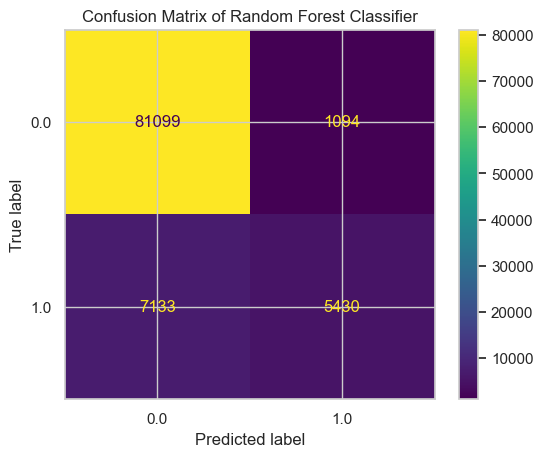

In [ ]:
accuracy_rfc = accuracy_score(y_test, predicted_rfc)
print('Accuracy: %.2f%%' % (accuracy_rfc * 100.0))

#cm_rfc = confusion_matrix(y_test, predicted_rfc)
#print('Confusion Matrix\n')
#print(cm_rfc)

disp_rfc = metrics.plot_confusion_matrix(rfc_tuned, X_test, y_test)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show() 

In [ ]:
model_evaluation(xgb_tuned)

Train Accuracy: 0.9165660321035564
Test Confusion Matrix: [[189815   1968]
 [ 16479  12835]]
--------------------
Test Accuracy: 0.914907763096796
Test Confusion Matrix: [[81357   836]
 [ 7227  5336]]


In [ ]:
print(classification_report(y_test, xgb_tuned.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     82193
         1.0       0.86      0.42      0.57     12563

    accuracy                           0.91     94756
   macro avg       0.89      0.71      0.76     94756
weighted avg       0.91      0.91      0.90     94756



ROC-AUC 0.9114817810878532


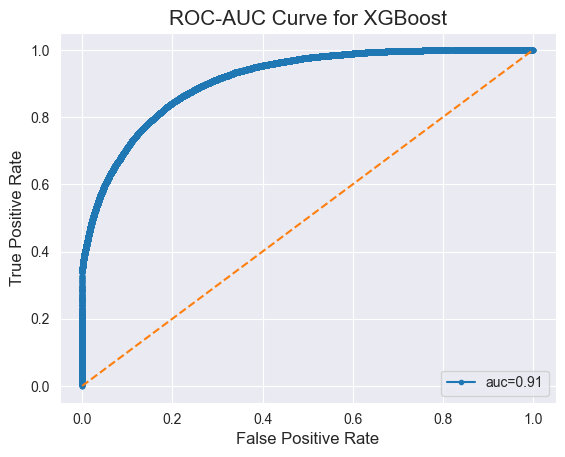

In [ ]:
from sklearn import metrics

y_pred_proba = xgb_tuned.predict_proba(X_test)[::,1]

clf_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC', clf_auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Visualize the result
label_auc = str(round(clf_auc,2))
plt.plot(fpr,tpr,label="auc="+label_auc, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC-AUC Curve for XGBoost', fontsize=15)
plt.legend(loc=4)
plt.show()